<a href="https://colab.research.google.com/github/HerasAy/Yapay-Zeka-Ai-/blob/main/Katman4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------
#📂 KATMAN 4: BİLGİSAYARLI GÖRÜ (COMPUTER VISION) - MÜFREDAT
---------------------
Bu katman, piksellerin dünyasını ve görüntü işlemenin modern kahramanı CNN mimarisini kapsar.

📚 Müfredat Planı
1. Giriş: Bilgisayarlar Nasıl Görür? Pikseller, Renk Kanalları (RGB) ve Matrisler.

2. ANN Neden Yetmez?: Mekansal İlişki Kaybı ve Parametre Patlaması Sorunu.

3. Evrişim (Convolution) İşlemi: Filtreler (Kernels) ve Özellik Haritaları.

4. CNN Parametreleri: Padding (Dolgu) ve Stride (Adım) Mantığı.

5. Aktivasyon: Görüntüde ReLU Neden Kullanılır? (Doğrusallığı Kırmak).

6. Ortaklama (Pooling): Max Pooling ile Boyut Küçültme ve Gürültü Atma.

7. Tam Bağlantı (Fully Connected): Özellikleri Karara Bağlamak (Flatten).

8. Mimariyi Birleştirmek: Uçtan Uca Basit Bir CNN Modeli (Keras ile).

9. Görselleştirme: Filtreler Ne Görüyor? (Kenar Tespiti, Doku Tespiti).

10. CNN Tarihçesi 1 (LeNet-5): İlk Başarılı CNN ve El Yazısı Tanıma.

11. CNN Tarihçesi 2 (AlexNet): Derin Öğrenme Devrimini Başlatan Model.

12. CNN Tarihçesi 3 (VGG-16): Derinlik ve Sadeliğin Gücü.

13. CNN Tarihçesi 4 (ResNet): Artık (Residual) Bağlantılar ve Vanishing Gradient Çözümü.

14. Veri Artırma (Data Augmentation): Az Veriyle Çok İş Yapmak (Döndürme, Kaydırma).

15. Transfer Öğrenimi (Transfer Learning) 1: Hazır Modelleri (Pre-trained) Kullanmak.

16. Transfer Öğrenimi 2: İnce Ayar (Fine-Tuning) Teknikleri.

17. Nesne Tespiti (Object Detection) Konsepti: Sadece "Ne?" değil, "Nerede?" (YOLO'ya giriş).

18. Görüntü Bölütleme (Segmentation): Piksel Piksel Sınıflandırma.

19. Autoencoders: Görüntü Gürültüsü Temizleme (Denoising).

20. Capstone Projesi: Kedi/Köpek Sınıflandırma (Gerçek Renkli Fotoğraflarla).
-------------
# 1. Giriş: Bir Resim Bin Sayıya Bedeldir
------------
Biz bir fotoğrafa baktığımızda bir "Manzara", "Kedi" veya "Arkadaşımızı" görürüz. Bilgisayar ise sadece devasa bir ***Sayılar Matrisi*** görür.

Bilgisayarlı Görü (Computer Vision), bu sayı yığınından anlamlı bilgiler (desenler, şekiller, nesneler) çıkarma bilimidir.


##Piksellerin Anatomisi

Dijital bir görüntü, *Piksel* (Picture Element) adı verilen en küçük yapı taşlarından oluşur.

 **Siyah-Beyaz Görüntüler (Grayscale)**

 Tek bir katmandan (kanaldan) oluşur. Her piksel 0 ile 255 arasında bir değer alır.
 * 0: Tam Siyah.
 * 255: Tam Beyaz.
 * 128: Gri.

 **Renkli Görüntüler (RGB)**

 İnsan gözünü taklit etmek için 3 ana renk kanalı kullanılır: *Kırmızı (Red), Yeşil (Green), Mavi (Blue)*.Bilgisayar renkli bir resmi, üst üste binmiş 3 farklı matris (3D Tensör) olarak görür.
 * Örn: <mark>(En: 1920, Boy: 1080, Kanal: 3) </mark>boyutunda bir matris.

##Sorun: Boyutun Büyüklüğü

Önceki katmandaki MNIST projesinde 28x28 piksellik küçük resimler kullandık. $28 \times 28 = 784$ giriş nöronu gerekiyordu. Bu yönetilebilir bir sayıdır.

Peki ya akıllı telefonunuzla çektiğiniz 1000x1000 boyutunda renkli bir fotoğraf?

* $1000 \times 1000 \times 3 \text{ (RGB)} = \textbf{3.000.000}$ giriş değeri!

Eğer bunu Klasik bir Sinir Ağına (Dense Layer) bağlamaya çalışırsanız:
* İlk gizli katmanda 1000 nöron olsa;
* $3.000.000 \times 1000 = 3 \text{ Milyar}$ ağırlık ($w$) parametresine ihtiyacınız olur.
* Bu modeli eğitmek için gereken işlem gücü ve veri miktarı imkansıza yakındır.

! Bu yüzden görüntülerde Klasik ANN kullanılamaz.

##Python Uygulaması: Resmi Matris Olarak Görmek
Python'da görüntü işleme kütüphaneleri (<mark>OpenCV</mark> veya <mark>Matplotlib</mark>) ile bir resmin perde arkasına bakalım.

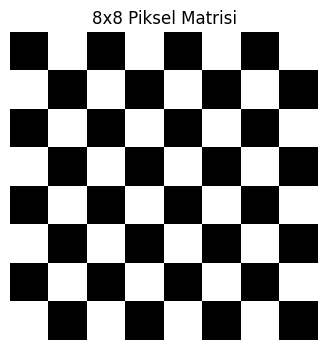

Matris Değerleri:
[[  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]
 [  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]
 [  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]
 [  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # OpenCV kütüphanesi

# 1. Basit bir 8x8 Görüntü Oluşturalım (Satranç tahtası gibi)
# 0: Siyah, 255: Beyaz
image_data = np.array([
    [0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 255, 0],
    [0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 255, 0],
    [0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 255, 0],
    [0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 255, 0]
], dtype='uint8')

# 2. Resmi Göster
plt.figure(figsize=(4, 4))
plt.imshow(image_data, cmap='gray')
plt.title("8x8 Piksel Matrisi")
plt.axis('off')
plt.show()

print("Matris Değerleri:")
print(image_data)

# 3. Gerçek Bir Resim Yükleme (Örnek)
# (Bu kısım yerel bilgisayarda bir 'kedi.jpg' varsa çalışır)
# img = cv2.imread('kedi.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV BGR okur, RGB'ye çevir
# plt.imshow(img)
# plt.show()
# print(f"Resmin Boyutu: {img.shape}")
# Çıktı Örneği: (224, 224, 3) -> 224x224 piksel, 3 Kanal

##Kod Analizi
* <mark>dtype='uint8'</mark>: Resim verileri hafıza tasarrufu için genelde "Unsigned Integer 8-bit" (0-255 arası tamsayı) olarak tutulur.

* Bilgisayar için o dama tahtası sadece 0 ve 255 sayılarından oluşan bir tablodur. "Kareleri" veya "Desenleri" görmez.

### Sonuç: Neye İhtiyacımız Var?
Bilgisayarın resimdeki desenleri (kenarlar, köşeler, dokular) algılaması lazım. Resmin tamamına tek seferde bakmak yerine (Klasik ANN), resim üzerinde küçük bir el feneri gezdirir gibi tarama yapmalıyız.

İşte bu tarama işlemine ***Evrişim (Convolution)*** denir.

-----------------
# 2- ANN Neden Yetmez?: Mekansal İlişki Kaybı ve Parametre Patlaması Sorunu
----------------

##Giriş: Düzleştirmenin Laneti
Bir önceki projede (MNIST), 28x28 boyutundaki rakam resimlerini tek bir uzun çubuğa (784 piksellik vektör) dönüştürmüştük (Flatten).Bunu yaptığımız anda Mekansal İlişkiyi (Spatial Relationship) öldürürüz.

* Bir insan yüzünde gözün hemen altında burun, burnun altında ağız vardır.
* Resmi düzleştirdiğinizde, göz pikseli 150. sırada, burun pikseli 420. sırada kalabilir. Aralarındaki komşuluk ilişkisi kaybolur. Klasik ANN, pikselleri "torbaya atılmış bilyeler" gibi bağımsız görür.

##Sorun 1: Konum Değişmezliği (Translation Invariance)
Klasik bir Sinir Ağına "Sağ üst köşedeki kedi" fotoğraflarıyla eğitim verirseniz, "Sol alt köşedeki kedi" fotoğrafını gösterdiğinizde tanıyamaz.

Çünkü ANN için o pikseller tamamen farklı giriş nöronlarına ($x_1$ yerine $x_{900}$ gibi) denk gelir.Bizim, kedinin nerede olduğundan bağımsız olarak "Bu bir kedi" diyebilen, taramalı bir sisteme ihtiyacımız var.

##Sorun 2: Parametre Patlaması (Parameter Explosion)

Bunu matematiksel olarak kanıtlayalım.Elinizde standart bir akıllı telefon fotoğrafı (1000 x 1000 piksel, Renkli) olsun.

* Girdi Sayısı: $1000 \times 1000 \times 3 = 3.000.000$

Bu resmi işlemek için ilk gizli katmana 1000 nöron koyduğumuzu varsayalım (ki bu az bile).
* Gerekli Ağırlık ($w$) Sayısı: $3.000.000 \text{ (Girdi)} \times 1.000 \text{ (Nöron)} = 3 \text{ Milyar!}$

Sadece tek bir katman için 3 milyar parametre eğitmek imkansızdır.

* İşlemci Yetmez: Eğitim aylar sürer.
* Veri Yetmez: 3 milyar parametreyi eğitmek için trilyonlarca resim gerekir.
* Sonuç: Aşırı Öğrenme (Overfitting) kaçınılmazdır.

Çözüm: Resmin tamamına aynı anda bakma. Küçük bir pencereden bak.

--------------------
# 3- Evrişim (Convolution) İşlemi: Filtreler (Kernels) ve Özellik Haritaları
----------------

##Giriş: El Feneri Analojisi

Karanlık bir odada duvarda bir resim olduğunu düşünün. Odayı aydınlatmak yerine elinizde küçük bir el feneriyle resmi parça parça tarıyorsunuz.
* Feneri sol üste tutuyorsunuz -> Bir kulak gördünüz.
* Sağa kaydırıyorsunuz -> Bir göz gördünüz.

İşte ***CNN (Convolutional Neural Network)*** tam olarak böyle çalışır. El fenerine teknik dilde ***Filtre (Filter)*** veya ***Çekirdek (Kernel)*** denir.

## Matematiksel Teori: Kaydırmalı Pencere
Evrişim işlemi, küçük bir matrisin (Filtre), büyük bir matris (Resim) üzerinde kayarak gezmesidir.

**Nasıl Çalışır?**

1. Filtreyi (Örn: 3x3 boyutunda) resmin sol üst köşesine koy.
2. Çakışan sayıları birbiriyle çarp (Element-wise multiplication).
3. Çıkan sonuçları topla. Bu, Özellik Haritasındaki (Feature Map) tek bir piksel olur.
4. Filtreyi bir piksel sağa kaydır ve tekrar et.


Matematiksel Formül (Basitleştirilmiş):$$Z_{yeni} = \sum (Görüntü_{bölgesi} \times Filtre)$$

## Filtreler Neyi Görür?

Filtreler rastgele sayılar değildir. Belirli desenleri yakalamak için tasarlanmış dedektörlerdir.Örneğin, Dikey Kenar Tespiti yapan bir filtre şuna benzer:

$$\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}$$Bu filtreyi bir resmin üzerinde gezdirdiğinizde;
* Sol tarafı parlak, sağ tarafı karanlık olan yerlerde (Dikey Çizgi) yüksek sayı üretir (Ateşler).
* Düz renkli alanlarda 0 üretir (Sessiz kalır).

## Python Uygulaması: Manuel Evrişim
Hiçbir kütüphane kullanmadan, kendi yazdığımız bir fonksiyonla bir resimdeki dikey çizgileri bulalım.

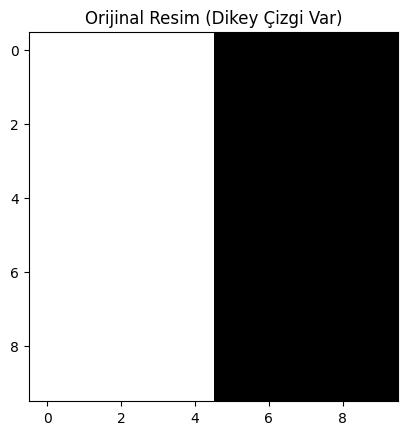

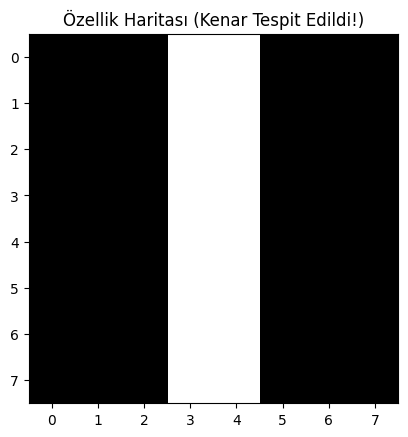

Özellik Haritası Değerleri:
[[ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]
 [ 0.  0.  0. 30. 30.  0.  0.  0.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Örnek Bir Resim Oluştur (Sol taraf Beyaz, Sağ taraf Siyah)
image = np.zeros((10, 10))
image[:, :5] = 10 # Sol yarısı parlak (10)
image[:, 5:] = 0  # Sağ yarısı karanlık (0)

plt.imshow(image, cmap='gray')
plt.title("Orijinal Resim (Dikey Çizgi Var)")
plt.show()

# 2. Dikey Kenar Filtresi (Vertical Edge Filter)
filtre = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# 3. Evrişim Fonksiyonu
def convolution2d(image, kernel):
    k_height, k_width = kernel.shape
    im_height, im_width = image.shape

    # Çıktı boyutu (Padding yoksa küçülür)
    out_height = im_height - k_height + 1
    out_width = im_width - k_width + 1

    output = np.zeros((out_height, out_width))

    # Kaydırma İşlemi
    for i in range(out_height):
        for j in range(out_width):
            # Resimden filtre boyutu kadar parça al
            region = image[i:i+k_height, j:j+k_width]
            # Çarp ve Topla
            output[i, j] = np.sum(region * kernel)

    return output

# 4. Filtreyi Uygula
feature_map = convolution2d(image, filtre)

# 5. Sonucu Göster
plt.imshow(feature_map, cmap='gray')
plt.title("Özellik Haritası (Kenar Tespit Edildi!)")
plt.show()

print("Özellik Haritası Değerleri:")
print(feature_map)

##Kod Analizi
* Orijinal resimde, 4. ve 5. sütun arasında keskin bir geçiş (beyazdan siyaha) vardır.

* Çıktı matrisine (Feature Map) baktığınızda, tam o geçişin olduğu yerde 30 gibi yüksek sayılar göreceksiniz.

* Diğer yerler (düz beyaz veya düz siyah) 0 olacaktır.

* Tebrikler! Makineye "dikey bir çizginin nerede olduğunu" buldurdunuz.

###CNN'in Gücü
Klasik ANN'de milyarlarca ağırlık gerekirken, burada sadece 3x3'lük bir filtre (9 parametre) ile tüm resmi taradık.

* ***Parameter Sharing (Parametre Paylaşımı):*** Aynı filtreyi (örneğin göz dedektörü) resmin her yerinde kullanırız. Bu, modelin boyutunu inanılmaz derecede küçültür ve öğrenmeyi hızlandırır.

--------------
# 4- CNN Parametreleri: Padding (Dolgu) ve Stride (Adım) Mantığı
----------------

##Giriş: Küçülen Resim Problemi

Bir önceki bölümde gördük ki, 3x3'lük bir filtreyi resmin kenarına koyduğumuzda taşmaması için içeriden başlamak zorundayız.
* 5x5'lik bir resme 3x3 filtre uygularsanız, çıktı 3x3 olur.
* Her katmanda resim böyle küçülürse, derin bir ağda (100 katmanlı) resim erkenden yok olur (1x1 piksele düşer).

Ayrıca, resmin kenarındaki pikseller (köşeler) filtrenin merkezine hiç gelemezler, sadece kenarından geçerler. Bu da kenarlardaki bilginin kaybolmasına yol açar.

## Çözüm 1: Dolgu (Padding)

Resmin boyutunu korumak için, resmin etrafına "sahte pikseller" (genellikle 0 değerinde, siyah çerçeve) ekleriz. Buna ***Zero Padding*** denir.
* ***Valid Padding:*** Dolgu yok. Resim küçülür. (Klasik evrişim).
* ***Same Padding:*** Çıktı boyutu girdiyle aynı (Same) olacak şekilde etrafına 0 eklenir.

## Çözüm 2: Adım (Stride)

Filtreyi her seferinde 1 piksel sağa kaydırmak zorunda değiliz. Eğer *Stride = 2* yaparsak, filtre 2 piksel zıplayarak gider.
* Bu, çıktının boyutunu yarıya indirir.
* Hesaplama yükünü azaltır (Downsampling).

## Matematiksel Formül: Boyut Hesabı

Bir CNN tasarlarken şu formülü ezbere bilmeniz gerekir. Bir katmandan çıkan görüntünün boyutu ne olacak?

$$Output = \frac{I - K + 2P}{S} + 1$$



* $I$ (Input): Girdi boyutu (Örn: 224).
* $K$ (Kernel): Filtre boyutu (Örn: 3).
* $P$ (Padding): Eklenen çerçeve kalınlığı (Örn: 1).
* $S$ (Stride): Adım sayısı (Örn: 1 veya 2).

Örnek: 28x28 resim, 3x3 filtre, Padding=1 (Same), Stride=1.


$$O = \frac{28 - 3 + 2(1)}{1} + 1 = 28$$



Sonuç: Boyut değişmedi (28x28).

##Python Uygulaması: Keras ile Boyut Testi
Hesap yapmanıza gerek yok, Keras bunu otomatik yapar. Ama mantığı görmek için bir "Dummy Model" kuralım.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Sequential

# 1. Model Oluştur (Sadece şekilleri görmek için)
model = Sequential()

# Giriş Katmanı: 28x28 boyutunda, 1 kanallı (Siyah-Beyaz) resim
model.add(Input(shape=(28, 28, 1)))

# --- KATMAN 1: Valid Padding (Küçültür) ---
# 32 tane filtre kullan, boyutu 3x3 olsun.
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', strides=(1, 1)))

# Çıktı Boyutunu Yazdır
print("Valid Padding Sonrası:", model.output_shape)
# Beklenen: (None, 26, 26, 32) -> 2 piksel küçüldü (28-2).

# --- KATMAN 2: Same Padding, Stride 2 (Yarıya İndirir) ---
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(2, 2)))

print("Same Padding + Stride 2 Sonrası:", model.output_shape)
# Beklenen: (None, 13, 13, 64) -> 26'nın yarısı 13 oldu.

Valid Padding Sonrası: (None, 26, 26, 32)
Same Padding + Stride 2 Sonrası: (None, 13, 13, 64)


###Kod Analizi
* ***filters=32:*** 32 farklı özelliği (dikey çizgi, yatay çizgi, eğri vb.) aynı anda arar. Sonuçta 32 katmanlı bir çıktı oluşur.

* ***padding='same':*** Boyutu korumaya çalışır ama ***strides=2*** olduğu için matematiksel olarak yarıya iner.

--------------------
# 5- Aktivasyon: Görüntüde ReLU Neden Kullanılır? (Doğrusallığı Kırmak)
------------------

## Giriş: Negatiflerin Anlamsızlığı

Evrişim (Convolution) işlemi aslında doğrusal bir işlemdir (Çarp ve Topla).Eğer bir resimdeki "Dikey Çizgileri" arıyorsak, filtremiz eşleştiği yerde pozitif sayılar üretir. Eşleşmediği yerde negatif veya sıfıra yakın sayılar üretir.

Bir görüntüde "Negatif Piksel" diye bir şey yoktur. Siyah (0) vardır.Bu yüzden, evrişimden çıkan sonuçlarda negatif değerleri (yani desenin bulunmadığı yerleri) tamamen susturmamız (0 yapmamız) gerekir.

## Neden ReLU (Rectified Linear Unit)?

Hatırlarsanız ReLU fonksiyonu: $f(x) = max(0, x)$ idi.CNN'lerde ReLU kullanmanın iki temel amacı vardır:

1. ***Doğrusallığı Kırmak (Non-Linearity):*** Ağırlıklı toplamlar ve matris çarpımları doğrusaldır. Gerçek dünya görüntüleri (kıvrımlar, gölgeler) doğrusal değildir. ReLU bu bükülmeyi sağlar.

2. ***Seyreklik (Sparsity):*** ReLU, negatif değerleri 0 yaparak matrisin çoğunu boşaltır. Bu, modelin sadece "önemli özelliklere" (ateşlenen nöronlara) odaklanmasını sağlar ve işlem yükünü hafifletir.

## Python Uygulaması: ReLU'nun Görsel Etkisi

Bir özellik haritasına ReLU uyguladığımızda görüntünün nasıl değiştiğini (siyahlaştığını) görelim.

Evrişim Çıktısı (ReLU Öncesi):
[[ 10  -5  20 -10]
 [ -2  15  -8  25]
 [  5  -5  30  -1]
 [-10   0 -20   5]]

Aktivasyon Sonrası (ReLU):
[[10  0 20  0]
 [ 0 15  0 25]
 [ 5  0 30  0]
 [ 0  0  0  5]]


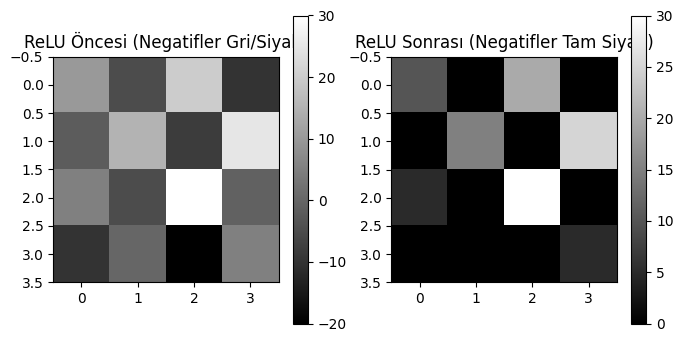

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# 1. Simüle Edilmiş Özellik Haritası (Feature Map)
# Rastgele pozitif ve negatif sayılar (Evrişim sonucu oluşmuş gibi)
feature_map = np.array([
    [10, -5, 20, -10],
    [-2, 15, -8, 25],
    [5, -5, 30, -1],
    [-10, 0, -20, 5]
])

print("Evrişim Çıktısı (ReLU Öncesi):")
print(feature_map)

# 2. ReLU Uygula
activated_map = relu(feature_map)

print("\nAktivasyon Sonrası (ReLU):")
print(activated_map)

# 3. Görselleştirme
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(feature_map, cmap='gray')
plt.title("ReLU Öncesi (Negatifler Gri/Siyah)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(activated_map, cmap='gray')
plt.title("ReLU Sonrası (Negatifler Tam Siyah)")
plt.colorbar()

plt.show()

###Görsel Yorum
Grafiğe baktığınızda:

* ***Sol Tarafta:*** Negatif değerler (desenin olmadığı yerler) gri veya karışık tonlarda görünür. Bu gürültüdür.

* ***Sağ Tarafta:*** Negatifler simsiyah (0) olmuştur. Sadece parlak noktalar (bulunan desenler) kalmıştır. Model artık "Nerede ne var?" sorusuna çok daha net odaklanabilir.

----------------
# 6- Ortaklama (Pooling): Max Pooling ile Boyut Küçültme ve Gürültü Atma
--------------

## Giriş: Detaylarda Boğulmamak
Bir resimde kedinin kulağını tespit ettiniz. Kulağın tam olarak 153. pikselde mi yoksa 154. pikselde mi olduğu önemli midir? Hayır. Önemli olan o bölgede bir kulak olmasıdır.

***Pooling (Ortaklama)*** katmanı, görüntünün boyutunu (en ve boy) küçültürken önemli özellikleri korumayı hedefler. Bu sayede:

1. ***İşlem Gücü Kazanılır:*** Görüntü küçülür, parametre sayısı azalır.

2. ***Overfitting Önlenir:*** Gereksiz detaylar atılır, model ezber yapamaz.

3. ***Konumdan Bağımsızlık Artar:*** Nesne biraz kaysa bile pooling sonucu değişmez.

## Max Pooling vs Average Pooling
En yaygın yöntem ***Max Pooling'***dir.

* 2x2'lik bir pencere alınır.

* Bu 4 sayıdan en büyüğü seçilir, diğerleri çöpe atılır.

* Pencere 2 piksel kaydırılır.

Neden en büyüğü? Çünkü ReLU'dan gelen yüksek sayılar "Burada bir özellik var!" (Örn: Kenar, Köşe) demektir. Biz en baskın özelliği alıp gerisini (gürültüyü) eliyoruz.

**Average Pooling** ise ortalamasını alır ama bu yöntem keskin özellikleri yumuşattığı için artık pek tercih edilmiyor.

##Python Uygulaması: Sıkıştırma İşlemi
Keras kullanarak bir matrisi Max Pooling ile nasıl yarı yarıya küçülttüğümüzü görelim.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import MaxPooling2D, Input
from tensorflow.keras.models import Sequential

# 1. Örnek Matris (4x4)
# 1 Kanallı (Reshape ile (1, 4, 4, 1) yapıyoruz çünkü Keras 4D tensör ister)
matrix = np.array([
    [10, 20, 10, 0],
    [50, 90, 15, 5],
    [8, 2, 40, 10],
    [1, 5, 20, 80]
]).reshape(1, 4, 4, 1)

# 2. Model (Sadece Pooling Katmanı)
model = Sequential([
    Input(shape=(4, 4, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2)
])

# 3. İşlemi Yap
output = model.predict(matrix)

print("Orijinal Matris:\n", matrix.reshape(4,4))
print("\nMax Pooling Sonrası (2x2):\n", output.reshape(2,2))

# Çıktı Analizi:
# Sol Üst (10,20,50,90) -> Max: 90
# Sağ Üst (10,0,15,5)   -> Max: 15
# Sol Alt (8,2,1,5)     -> Max: 8
# Sağ Alt (40,10,20,80) -> Max: 80

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Orijinal Matris:
 [[10 20 10  0]
 [50 90 15  5]
 [ 8  2 40 10]
 [ 1  5 20 80]]

Max Pooling Sonrası (2x2):
 [[90. 15.]
 [ 8. 80.]]


**Sonuç**

Gördüğünüz gibi 16 piksellik veri 4 piksele düştü (%75 sıkıştırma). Ama en önemli sayılar (90, 80 gibi yüksek aktivasyonlar) korundu.

------------------
# 7- Tam Bağlantı (Fully Connected): Özellikleri Karara Bağlamak (Flatten)
---------------

##  Giriş: Beyne Geçiş

Şu ana kadar yaptığımız işlemler (Conv -> ReLU -> Pool) aslında *Özellik Çıkarımı (Feature Extraction)* aşamasıydı. Yani "Gözü bul", "Kulağı bul", "Bıyığı bul".

Ama hala model "Bu bir kedidir" diyemiyor. Elimizde sadece soyut özellik haritaları (küçük matrisler) var.Karar vermek için, 3. Katmanda öğrendiğimiz klasik *Yapay Sinir Ağına (MLP)* ihtiyacımız var.

## Flatten (Düzleştirme)
Klasik sinir ağları (Dense Layer) matris (kare) kabul etmez, vektör (çubuk) kabul eder.Bu yüzden son Pooling katmanından çıkan 3 boyutlu veriyi (En x Boy x Kanal) tek boyutlu bir vektöre dönüştürmeliyiz. Buna ***Flatten*** denir.
* Örnek: Son katmanda elinizde 5x5 boyutunda 64 tane filtre haritası kaldı.
* Flatten işlemi: $5 \times 5 \times 64 = 1600$ nöronluk dümdüz bir giriş vektörü oluşturur.

## Fully Connected (Dense) Katmanı

Artık elimizde 1600 tane sayı var. Bunları standart bir Dense katmana bağlarız.
* ***Gizli Katman:*** Özellikleri birleştirir (Örn: "Sivri kulak" ve "Bıyık" varsa, bunları bir araya getir).

* ***Çıktı Katmanı (Softmax):*** Son kararı verir. (Kedi: %90, Köpek: %10).
## Python Uygulaması: Mimariyi Tamamlamak
Parçaları birleştirip bir CNN'in son kısmını (Kuyruğunu) oluşturalım.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

# --- BÖLÜM 1: GÖZ (Özellik Çıkarımı) ---
model.add(Input(shape=(64, 64, 3))) # 64x64 Renkli Resim

# Conv + Pool 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Conv + Pool 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Şu anki boyuta bakalım
print("Flatten Öncesi Boyut:", model.output_shape)
# Muhtemelen (None, 14, 14, 64) gibi bir şey olacak.

# --- BÖLÜM 2: BEYİN (Sınıflandırma) ---
model.add(Flatten()) # Matrisi Vektöre çevir

print("Flatten Sonrası Boyut:", model.output_shape)
# 14*14*64 = 12544 nöronluk bir vektör oldu.

model.add(Dense(128, activation='relu')) # Gizli Katman
model.add(Dense(1, activation='sigmoid')) # Çıktı (Kedi mi Köpek mi?)

model.summary()

Flatten Öncesi Boyut: (None, 14, 14, 64)
Flatten Sonrası Boyut: (None, 12544)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

###Kod Analizi
* <mark>model.summary()</mark> çıktısına baktığınızda, parametre sayısının en çok arttığı yerin Dense katmanı olduğunu göreceksiniz. Çünkü <mark>Flatten</mark> ile gelen binlerce nöron, Dense katmanındaki her bir nörona bağlanır.

* CNN'in büyüsü şudur: Conv katmanları az parametreyle çok iş yapar (görür), Dense katmanları ise gördüğünü yorumlar.

----------------
# 8- Mimariyi Birleştirmek: Uçtan Uca Basit Bir CNN Modeli (Keras ile)
----------------
##Giriş: Lego Parçalarını Birleştirmek
Artık teoriyi biliyoruz. Bir CNN mimarisi genellikle şu standart kalıbı (Pattern) takip eder:

1. ***Giriş:*** Resim (Örn: 32x32x3)

2. ****Özellik Çıkarımı (Göz):*** [Conv -> ReLU -> Pool] x N kez tekrarla.

3. ***Sınıflandırma (Beyin):*** [Flatten -> Dense -> Dense -> Softmax].

Bu bölümde, MNIST'ten daha zorlu olan, renkli ve karmaşık nesneler içeren meşhur *CIFAR-10* veri seti üzerinde çalışacağız. (Uçak, Araba, Kuş, Kedi, Geyik, Köpek, Kurbağa, At, Gemi, Kamyon).

## Python Uygulaması: Uçtan Uca CNN Modeli


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Veri Yükleme ve Hazırlık
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizasyon (0-255 arasını 0-1 yap)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Etiketleri Kodlama (One-Hot)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Eğitim Verisi: {X_train.shape}") # (50000, 32, 32, 3)

# 2. Modeli Kurma (Klasik Mimari)
model = Sequential()
model.add(Input(shape=(32, 32, 3)))

# Blok 1: Düşük seviye özellikler (Kenar, Renk)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2))) # Boyut: 16x16 oldu

# Blok 2: Orta seviye özellikler (Şekil, Desen)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2))) # Boyut: 8x8 oldu

# Blok 3: Yüksek seviye özellikler (Kulak, Tekerlek)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2))) # Boyut: 4x4 oldu

# Sınıflandırıcı
model.add(Flatten()) # Vektöre çevir (4*4*128 = 2048 nöron)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Ezberlemeyi önle
model.add(Dense(10, activation='softmax')) # 10 Sınıf

# 3. Derleme ve Eğitim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 4. Sonuç
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Başarısı: %{acc*100:.2f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Eğitim Verisi: (50000, 32, 32, 3)
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 137ms/step - accuracy: 0.2799 - loss: 1.9236 - val_accuracy: 0.5617 - val_loss: 1.2517
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 137ms/step - accuracy: 0.5232 - loss: 1.3270 - val_accuracy: 0.6337 - val_loss: 1.0650
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.5944 - loss: 1.1449 - val_accuracy: 0.6625 - val_loss: 0.9580
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.6481 - loss: 1.0097 - val_accuracy: 0.7048 - val_loss: 0.8555
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.6763 - loss: 0.9301 - val_accuracy: 0.7095 - val_loss: 0.8434
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 135ms/step - accuracy: 0.7020 - loss: 0.8606 - val_accuracy: 0.7069 - val_loss: 0.8399
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.7235 - loss: 0.7981 - val_accuracy: 0.7222 - val_lo

###Kod Analizi
Modelimiz her MaxPooling adımında resmin boyutunu yarıya indirirken, Conv2D filtre sayısını (32 -> 64 -> 128) artırarak derinleşiyor.

Yani resim küçülüyor ama bilgi yoğunluğu (derinlik) artıyor. CNN'lerin genel çalışma prensibi budur: ***"Geniş ve Sığ"dan -> "Dar ve Derin"e.***

-----------------
# 9- Görselleştirme: Filtreler Ne Görüyor? (Kenar Tespiti, Doku Tespiti)
----------------
##Giriş: Makine Rüya Görür mü?
Sinir ağlarına "Kara Kutu" (Black Box) denir çünkü içeride ne döndüğünü anlamak zordur. Ancak CNN'lerde durum farklıdır. Filtreleri görselleştirerek ağın ne öğrendiğini görebiliriz.

* **İlk Katmanlar:** Dikey çizgiler, yatay çizgiler, renk geçişleri gibi basit geometrik şekilleri görür.

* **Orta Katmanlar:** Daireler, kareler, petek dokuları gibi desenleri görür.

* **Son Katmanlar:** Yüzler, tekerlekler, kapılar gibi karmaşık nesne parçalarını görür.

## Python Uygulaması: Özellik Haritalarını Çizmek
Eğittiğimiz modelin içine girip, bir resim verdiğimizde 1. Katmandaki filtrelerin o resmi nasıl algıladığına bakalım.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1. Katman Çıktı Boyutu: (1, 32, 32, 32)


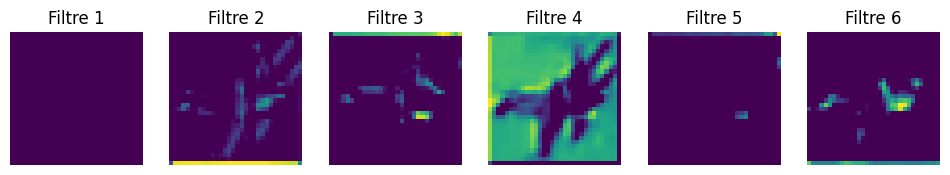

In [ ]:
from tensorflow.keras.models import Model

# 1. Modeli Parçalama
# Orijinal modelin girişini al, ama çıkış olarak 1. Conv katmanının (index 0) çıktısını ver.
# (Not: Modeldeki katman indeksleri mimariye göre değişebilir, Conv2D'yi hedefleyin)
layer_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name]

# FIX: Use model.layers[0].input to explicitly get the input tensor.
# This is a more robust way to specify the input for the new functional model,
# as the error indicates model.input was not properly resolved.
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

# 2. Rastgele Bir Resim Seç (Örn: Test setinden bir Kurbağa)
img = X_test[10].reshape(1, 32, 32, 3)

# 3. Aktivasyonları Al
activations = activation_model.predict(img)
first_layer_activation = activations[0] # İlk Conv katmanının çıktısı

print(f"1. Katman Çıktı Boyutu: {first_layer_activation.shape}")
# (1, 32, 32, 32) -> 32 farklı filtre haritası

# 4. Görselleştirme (İlk 6 Filtre)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(1, 6, i+1)
    # i. filtrenin gördüğü haritayı çiz
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filtre {i+1}")
plt.show()

##Görsel Analizi
Çıkan resimlere dikkatle bakın:

* ***Filtre 1:*** Belki sadece resmin kenarlarını parlatmıştır (Kenar Dedektörü).

* ***Filtre 2:*** Belki sadece yeşil alanları vurgulamıştır (Renk Dedektörü).

* ***Filtre 3:*** Belki arka planı yok edip sadece nesneye odaklanmıştır.

Bu görselleştirme, modelin ezberlemediğini, gerçekten nesnenin şekline ve yapısına odaklandığını kanıtlar.

## Derinlere İnmek
Eğer 3. veya 4. katmanın çıktılarını çizdirirseniz, resimlerin daha soyut ve tanınmaz hale geldiğini (pikselleştiğini) göreceksiniz. Çünkü ağ derinleştikçe "Görüntüden" uzaklaşır, "Anlama" (Semantik) yaklaşır. Pikseller artık piksel değil, "Kedi olma ihtimali" taşıyan sinyallere dönüşmüştür.

-----------------
# 10- CNN Tarihçesi 1 (LeNet-5): İlk Başarılı CNN ve El Yazısı Tanıma.
---------------
##Giriş: 1998 Yılına Yolculuk
Yann LeCun (Yapay Zekânın babalarından biri), 1998 yılında ***LeNet-5*** mimarisini tanıttığında dünya henüz derin öğrenmeye hazır değildi. Bilgisayarlar yavaştı, veri azdı.

Ancak LeCun, bu modelle ABD'deki banka çeklerinin üzerindeki el yazısı rakamları otomatik okuyan bir sistem kurmayı başardı. Bugün öğrendiğimiz "Conv -> Pool -> Conv -> Pool -> FC" yapısının atası budur.

##LeNet-5 Mimarisi
Oldukça basit ve küçük bir mimaridir (Toplamda sadece 60.000 parametre).

1. ***Giriş:*** 32x32 Siyah-Beyaz Resim (MNIST).

2. ***C1 (Conv):*** 6 Filtre (5x5 boyutunda).

3. ***S2 (Pool):*** Average Pooling (O zamanlar Max Pooling icat edilmemişti).

4. ***C3 (Conv):*** 16 Filtre (5x5).

5. ***S4 (Pool):*** Average Pooling.

6. ***C5 (Flatten + Dense):*** 120 Nöron.

7. ***F6 (Dense):*** 84 Nöron.

8. ***Çıktı:*** 10 Sınıf (RBF kullanılıyordu, şimdi Softmax kullanıyoruz).

## Python Uygulaması: Modern LeNet
Orijinal LeNet'te <mark>Sigmoid</mark> veya <mark>Tanh</mark> aktivasyonları kullanılıyordu. Biz bunu günümüz teknolojisine (ReLU ve MaxPool) uyarlayarak Keras ile yeniden inşa edelim.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input

def build_lenet():
    model = Sequential()

    # Giriş Katmanı
    model.add(Input(shape=(32, 32, 1)))

    # C1: 6 Filtre, 5x5, Tanh
    model.add(Conv2D(6, (5, 5), activation='tanh', padding='valid'))

    # S2: Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    # C3: 16 Filtre, 5x5
    model.add(Conv2D(16, (5, 5), activation='tanh', padding='valid'))

    # S4: Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    # Flatten
    model.add(Flatten())

    # C5: 120 Nöron
    model.add(Dense(120, activation='tanh'))

    # F6: 84 Nöron
    model.add(Dense(84, activation='tanh'))

    # Çıkış: 10 sınıf
    model.add(Dense(10, activation='softmax'))

    return model

model_lenet = build_lenet()
model_lenet.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

**Neden Artık Kullanmıyoruz?**

LeNet, MNIST gibi basit (siyah-beyaz, küçük) veri setlerinde harika çalışır. Ancak renkli, yüksek çözünürlüklü ve karmaşık (Kedi vs Köpek) resimlerde kapasitesi yetersiz kalır. Özellikleri öğrenemez.

---------------
# 11- CNN Tarihçesi 2 (AlexNet): Derin Öğrenme Devrimini Başlatan Model
-------------

##Giriş: 2012 ImageNet Yarışması
Yapay zekâ dünyasının "Miladı" kabul edilen andır. Her yıl düzenlenen ImageNet yarışmasında (1000 farklı sınıftan 1 milyon resim), klasik bilgisayarlı görü algoritmaları %26 civarında hata yapıyordu.

2012'de Alex Krizhevsky ve Geoffrey Hinton, ***AlexNet*** adlı modeli sundular. Hata oranını ***%15.3***'e düşürdüler. Rakiplerine o kadar büyük fark attılar ki, o günden sonra herkes CNN kullanmaya başladı. ***Yapay Zekâ Kışı*** resmen bitti.

##AlexNet'in Devrimsel Yenilikleri
AlexNet mimari olarak LeNet'e benzer ama çok daha "büyüktür". Ancak asıl farkı mimarisi değil, getirdiği teknikleridir:

1. ***ReLU Devrimi:*** İlk kez Sigmoid/Tanh yerine ReLU kullanıldı. Eğitim 6 kat hızlandı.

2. ***Dropout:*** Overfitting'i engellemek için ilk kez burada popüler oldu.

3. ***GPU Kullanımı:*** Model o kadar büyüktü ki işlemciler (CPU) yetmedi. Tarihte ilk kez NVIDIA ekran kartları (CUDA) ile model eğitildi.

4. ***Veri Artırma (Data Augmentation):*** Resimleri çevirip, kesip çoğaltarak veri setini büyüttüler.

##Mimari Detayları
* ***Giriş:*** 227x227x3 (Renkli ve Büyük).

* ***Conv 1:*** 96 Filtre (11x11 boyutunda!).

    * Not: 11x11 çok büyük bir filtredir. Günümüzde pek kullanılmaz.

* ***Toplam Katman:*** 5 Conv + 3 Dense = 8 Katman.

* ***Parametre Sayısı:*** 60 Milyon (LeNet'in 1000 katı).

##Python Uygulaması: AlexNet'i Kodlamak
Bu devasa yapıyı Keras ile kurmak şaşırtıcı derecede basittir.

*Önemli Not*
AlexNet'i sıfırdan eğitmek, güçlü bir GPU ile bile günler sürebilir (ImageNet verisiyle). Bu yüzden bu kodu kendi bilgisayarınızda sadece mimariyi görmek için çalıştırın, devasa veriyle eğitmeye kalkışmayın!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_alexnet():
    model = Sequential()

    # 1. Katman: Büyük filtreler (11x11), Stride 4 (Hızlı küçültme)
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)))
    model.add(MaxPooling2D((3, 3), strides=2))

    # 2. Katman: 5x5 Filtreler
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=2))

    # 3, 4, 5. Katmanlar: Arka arkaya Conv (Pooling yok)
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=2))

    # Tam Bağlantı (Dense) Katmanları
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5)) # İşte o meşhur Dropout

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Çıktı (ImageNet'te 1000 sınıf vardır)
    model.add(Dense(1000, activation='softmax'))

    return model

alexnet = build_alexnet()
# alexnet.summary() # Çok büyük çıktı verir!
print("AlexNet kuruldu.")

AlexNet kuruldu.


---------------
# 12- CNN Tarihçesi 3 (VGG-16): Derinlik ve Sadeliğin Gücü
-------------

##Giriş: "Küçük Güzeldir"
2014 yılında Oxford Üniversitesi'nden VGG (Visual Geometry Group) ekibi, çok basit bir felsefeyle ortaya çıktı: "Neden AlexNet gibi karmaşık, devasa filtreler (11x11) kullanıyoruz? Küçük filtreleri (3x3) üst üste koyarsak daha iyi olmaz mı?"

VGG-16, mimariyi tamamen standartlaştırdı. İçinde sadece **3x3** Conv ve **2x2** MaxPool katmanları vardır. Başka hiçbir garip boyut yoktur.

## Neden 3x3 Filtre?
Matematiksel bir hile:

Bir tane 5x5 filtre kullanmak yerine, ***iki tane 3x3*** filtreyi arka arkaya koyarsanız, resim üzerinde aynı alanı (Receptive Field) tararsınız.

* ***Avantaj 1***: Daha az parametre (5x5=25 vs 3x3+3x3=18).

* ***Avantaj 2***: İki katman olduğu için araya iki tane ReLU girer. Bu da modelin "doğrusallığı kırma" yeteneğini artırır.

## Python Uygulaması: VGG Blokları
VGG-16, adından da anlaşılacağı gibi 16 ağırlık katmanından oluşur. Keras ile bu mimariyi Lego gibi kurmak çok zevklidir.

###VGG'nin Mirası
VGG, derin öğrenmede Transfer Learning (hazır model kullanımı) çağını başlatan modeldir. Bugün bile bir projeye başlarken "Acaba VGG ile denesek mi?" diye düşünülür çünkü mimarisi çok anlaşılırdır.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_vgg16():
    model = Sequential()

    # Blok 1: 2 tane Conv, 1 tane Pool
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=2))

    # Blok 2: Filtre sayısı 2 katına çıkar (128)
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=2))

    # Blok 3: Filtre sayısı 256
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=2))

    # Blok 4 ve 5: Filtre sayısı 512
    # ... (Kod tekrarı olmaması için burayı atlıyorum, Blok 3 ile aynı yapıda ama 512 filtreli)

    # Sınıflandırıcı
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    return model

# Not: VGG-16'nın en büyük sorunu parametre sayısıdır (Yaklaşık 138 Milyon).
# Dosya boyutu 500MB'ı geçer.

---------------
# 13- CNN Tarihçesi 4 (ResNet): Artık (Residual) Bağlantılar ve Vanishing Gradient Çözümü
-------------
 ##Giriş: Derinliğin Laneti

 VGG (19 katman) ve GoogleNet (22 katman) ile sınırlar zorlandı. Ama araştırmacılar daha derine (50, 100 katman) inmeye çalıştıklarında garip bir şey oldu: ***Başarı oranı düştü.***

 Teorik olarak daha derin bir ağın daha iyi öğrenmesi gerekirdi. Sorun "Vanishing Gradient" idi. Hata (Loss) geriye doğru yayılırken (Backpropagation), zincirleme türev alma işlemi yüzünden sayı o kadar küçülüyordu ki, ilk katmanlara ulaştığında sıfırlanıyordu. İlk katmanlar hiçbir şey öğrenemiyordu.

 ## Çözüm: ResNet (Residual Networks)

 2015 yılında Microsoft Research ekibi (Kaiming He ve ark.), ***Skip Connection (Atlama Bağlantısı)*** fikrini ortaya attı.

 Normalde veri A katmanından B katmanına gider ($x \rightarrow F(x)$).ResNet'te ise veri, B katmanının çıktısına ***doğrudan eklenir***.

 $$y = F(x) + x$$

 Bu "kestirme yol", gradyanın (hatanın) geriye doğru akarken tıkanmadan, otoban gibi en başa kadar ulaşmasını sağlar.

 ##Python Uygulaması: Residual Block Kodlamak

 Keras'ın Sequential API'si (alt alta dizilen yapı) ResNet için yetersizdir çünkü katmanlar birbirinin üzerinden atlar. Bunun için ***Functional API*** kullanacağız.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(x, filters):
    """
    Bir ResNet Bloğu:
    Girdi (x) -> Conv -> BN -> ReLU -> Conv -> BN -> (+ x) -> ReLU
    """
    shortcut = x # Girdiyi sakla (Kestirme yol)

    # Ana Yol (Main Path)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # --- SİHİRLİ AN: Toplama İşlemi ---
    # Ana yoldan gelen işlenmiş veri ile sakladığımız ham veriyi topla
    x = Add()([x, shortcut])

    # Toplamdan sonra son aktivasyon
    x = Activation('relu')(x)
    return x

# Modeli Kurma (Basit bir ResNet)
input_layer = Input(shape=(32, 32, 3))

# İlk Conv
x = Conv2D(64, (7, 7), padding='same')(input_layer)
x = Activation('relu')(x)

# ResNet Blokları (Arka arkaya ekle)
x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 64)
# ... İstediğin kadar ekle, gradyan kaybolmaz!

# Çıktı
x = GlobalAveragePooling2D()(x) # Flatten yerine daha modern bir yöntem
output_layer = Dense(10, activation='softmax')(x)

model_resnet = Model(inputs=input_layer, outputs=output_layer)
print("ResNet (Skip Connection ile) kuruldu.")

ResNet (Skip Connection ile) kuruldu.


###ResNet'in Zaferi
ResNet, 2015 yarışmasında 152 katmanlı bir modelle katıldı ve hatayı %3.57'ye düşürdü. (İnsan hatası %5 civarındadır). Yani ResNet, resimleri insanlardan daha iyi sınıflandıran ilk model oldu.

---------------
# 14- Veri Artırma (Data Augmentation): Az Veriyle Çok İş Yapmak (Döndürme, Kaydırma)
-------------
##Giriş: Sınava Hazırlık Taktiği
Bir sınava hazırlandığınızı düşünün ama elinizde sadece 10 tane örnek soru var. Bunları ezberlerseniz (Overfitting), sınavda sorunun rakamları değişince çuvallarsınız. Ne yaparsınız? Soruları değiştirirsiniz: Rakamları değiştirir, kağıdı ters çevirip okumaya çalışır, sorunun aynadaki yansımasına bakarsınız.

***Veri Artırma (Data Augmentation)***, eldeki resimleri ***döndürerek, yakınlaştırarak, kaydırarak veya rengini değiştirerek*** yapay veri üretme tekniğidir. Bu sayede modeliniz "düz duran kedi"yi değil, "kedilik kavramını" öğrenir.

##Yaygın Teknikler
1. ***Rotation (Döndürme):*** Resmi rastgele açılarla (örn: -20 ile +20 derece) döndür.

2. ***Width/Height Shift (Kaydırma):*** Resmi sağa/sola/yukarı/aşağı kaydır. (Kedi her zaman merkezde olmaz).

3. ***Flip (Çevirme):*** Yatay (Aynalama) veya dikey çevirme.

    * Uyarı: Rakam tanıma yapıyorsanız "6"yı dikey çevirirseniz "9" olur. Bu durumda dikey flip yapılmaz!

4. ***Zoom (Yakınlaştırma):*** Nesneye zoom yap.

5. ***Brightness (Parlaklık):*** Resmi karart veya aydınlat.

##Python Uygulaması: Keras ile Canlı Artırma

Eskiden bu resimleri tek tek Photoshop ile yapıp diske kaydetmek gerekirdi. Keras'ın <mark>ImageDataGenerator</mark> sınıfı bunu ***eğitim sırasında (On-the-fly)*** yapar. Diskten resmi okur, hafızada büker ve modele verir. Diskte yer kaplamaz.

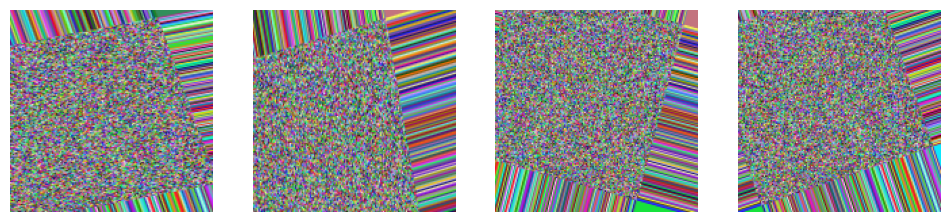

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# 1. Artırma Ayarlarını Yapılandır
datagen = ImageDataGenerator(
    rotation_range=40,      # 40 dereceye kadar döndür
    width_shift_range=0.2,  # %20 sağa/sola kaydır
    height_shift_range=0.2, # %20 yukarı/aşağı kaydır
    shear_range=0.2,        # Resmi yamult (perspektif)
    zoom_range=0.2,         # %20 yakınlaş
    horizontal_flip=True,   # Yatay aynala
    fill_mode='nearest'     # Kaydırma sonucu oluşan boşlukları en yakın renkle doldur
)

# 2. Örnek Resim Yükle (Elinizde 'cat.jpg' olduğunu varsayalım)
# Eğer yoksa rastgele gürültü kullanalım
img = np.random.random((1, 150, 150, 3))
# img = load_img('cat.jpg')  # Gerçek resim için bu satırı açın
# x = img_to_array(img)      # (150, 150, 3)
# x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) - Batch boyutu ekle

# 3. Üretim Döngüsü
i = 0
plt.figure(figsize=(12, 3))
for batch in datagen.flow(img, batch_size=1):
    plt.subplot(1, 4, i+1)
    plt.imshow(batch[0])
    plt.axis('off')

    i += 1
    if i % 4 == 0:
        break # 4 tane üretince dur

plt.show()

###Sonuç
Kod çalıştığında, aynı resmin 4 farklı versiyonunu (biri yamuk, biri yakın, biri ters vb.) göreceksiniz. Modeliniz artık 1 resimden değil, sonsuz varyasyondan öğreniyor demektir.

---------------
# 15- Transfer Öğrenimi (Transfer Learning) 1: Hazır Modelleri (Pre-trained) Kullanmak
-------------

##Giriş: Tekerleği Yeniden İcat Etme

Sizden "Kedi ve Köpekleri" ayıran bir model yapmanızı istesem, oturup milyonlarca kedi fotoğrafı bulup, VGG-16 mimarisini sıfırdan kurup, haftalarca eğitir misiniz?Hayır.

Zaten ImageNet yarışması için eğitilmiş, 1000 farklı nesneyi (kedi ve köpek dahil) tanıyan VGG-16 gibi modeller internette hazır var.***Transfer Learning***, bu eğitilmiş modelin "görme yeteneğini" alıp, kendi küçük problemimize uyarlama sanatıdır.

"Gitar çalmayı bilen biri, keman çalmayı sıfırdan başlayan birine göre çok daha hızlı öğrenir."

## Nasıl Çalışır?

Bir CNN iki parçadan oluşur demiştik:

1. ***Gövde (Convolutional Base):*** Görüntüden özellik (kenar, kulak, göz) çıkarır.
2. ***Kafa (Classifier/Dense):*** Karar verir (Bu bir kedidir).

Transfer Learning stratejisi şudur:
1. Hazır bir model (Örn: VGG16) indir.
2. ***Kafasını Kes:*** Sonundaki Dense katmanlarını at.
3. ***Gövdeyi Dondur (Freeze):*** Conv katmanlarının ağırlıklarını ($w$) eğitilmez yap (Trainable=False). Çünkü onlar zaten görmeyi biliyor, bozmayalım.
4. ***Yeni Kafa Tak:*** Kendi probleminize uygun (Örn: 2 sınıf için) yeni Dense katmanları ekle.
5. ***Eğit:*** Sadece yeni eklediğin kafayı eğit.

## Python Uygulaması: VGG16 ile Transfer Learning

Keras'ta Applications modülü altında VGG, ResNet, Inception gibi modeller hazır gelir.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Hazır Modeli İndir (Kafasız)
# include_top=False: Sondaki 1000 sınıflık Dense katmanlarını alma.
# weights='imagenet': ImageNet ile eğitilmiş ağırlıkları getir (Rastgele olmasın).
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

# 2. Gövdeyi Dondur (KRİTİK ADIM!)
conv_base.trainable = False

# 3. Kendi Modelini Kur
model = Sequential()
model.add(conv_base) # Eğitilmiş VGG'yi ekle
model.add(Flatten()) # Vektöre çevir

# Kendi Sınıflandırıcımız
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Kedi(0) vs Köpek(1)

# 4. Özeti Gör
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

##Kod Analizi
* <mark>model.summary()</mark> çıktısına baktığınızda, VGG'den gelen milyonlarca parametrenin "Non-trainable" (Eğitilemez) olduğunu göreceksiniz.

* Model sadece sondaki <mark>Dense</mark> katmanındaki az sayıda parametreyi eğitecektir.

* Bu sayede, elinizde sadece 100 kedi resmi olsa bile, VGG'nin milyonlarca resimden edindiği "görme tecrübesini" kullanarak %95+ başarı elde edebilirsiniz.

---------------
# 16- Transfer Öğrenimi 2: İnce Ayar (Fine-Tuning) Teknikleri
-------------
##Giriş: Kaba Ayar vs İnce Ayar
Önceki bölümde VGG16'nın tüm gövdesini dondurup (Freeze) sadece yeni eklediğimiz "Kafa" kısmını eğitmiştik. Bu, mikroskobun kaba ayar düğmesini çevirmek gibidir. Görüntü nettir ama mükemmel değildir.

Fine-Tuning (İnce Ayar) stratejisi şudur: Kafa kısmı iyice eğitildikten sonra, dondurduğumuz VGG16 gövdesinin son birkaç katmanının kilidini açarız ve çok düşük bir öğrenme hızıyla tekrar eğitiriz. Böylece model, "Genel kedi özelliklerini" (kulak, bıyık) unutmadan, bizim veri setimizdeki "Tekir kedilere" özel detayları öğrenir.

##Altın Kurallar
1. ***Önce Kafayı Eğit:*** Asla sıfırdan Fine-Tuning yapma. Rastgele ağırlıklara sahip kafa kısmı, VGG'nin hassas ayarlarını bozar (Gradient patlaması). Önceki dersteki eğitimi bitir, sonra Fine-Tuning'e geç.

2. ***Az Katman Aç:*** VGG'nin ilk katmanları (kenar, çizgi) çok temeldir, onları değiştirmeye gerek yok. Sadece son blokları (Block 5) aç.

3. ***Düşük Learning Rate:*** Öğrenme hızını çok düşür (Örn: 1e-5). Amacımız büyük değişiklikler yapmak değil, cilalamak.

##Python Uygulaması: Kilitleri Açmak
Önceki dersteki kodun devamı niteliğindedir.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Gerçek veri için gerekli olabilir

# Varsayalım ki 'conv_base' (VGG16) ve 'model' zaten tanımlı ve kafa kısmı eğitildi.
# (Bunlar genellikle önceki hücrede 'zVVjGWCG7dHT' tanımlanır)

# *** HATA DÜZELTMESİ: 'train_dataset' ve 'validation_dataset' Tanımlanıyor ***
# Bu örnek, modelin beklediği (150, 150, 3) boyutunda ve ikili etiketlere sahip
# veri setleri oluşturmak için yer tutucu (dummy) veriler kullanır.
# Gerçek uygulamanızda, kendi veri setinizi yüklemeniz ve işlemeniz gerekecektir.

# Yer tutucu veri oluşturma
num_samples = 100 # Eğitim için 100 örnek
num_val_samples = 20 # Doğrulama için 20 örnek
image_size = (150, 150)
channels = 3
num_classes = 1 # Binary classification

# Giriş görüntüleri (rastgele, 0-1 arası)
dummy_x_train = np.random.rand(num_samples, image_size[0], image_size[1], channels).astype(np.float32)
# İkili etiketler (0 veya 1)
dummy_y_train = np.random.randint(0, 2, size=(num_samples, num_classes)).astype(np.float32)

dummy_x_val = np.random.rand(num_val_samples, image_size[0], image_size[1], channels).astype(np.float32)
dummy_y_val = np.random.randint(0, 2, size=(num_val_samples, num_classes)).astype(np.float32)

# tf.data.Dataset nesneleri oluşturma
train_dataset = tf.data.Dataset.from_tensor_slices((dummy_x_train, dummy_y_train)).batch(32)
validation_dataset = tf.data.Dataset.from_tensor_slices((dummy_x_val, dummy_y_val)).batch(32)
# *** HATA DÜZELTMESİ SONU ***


# 1. Katmanların Kilidini Açma Stratejisi
# 'conv_base' değişkeninin tanımlı olduğundan emin olun (önceki hücreden gelmeli).
if 'conv_base' in locals() or 'conv_base' in globals():
    conv_base.trainable = True # Önce hepsini aç

    # Sonra "Block5" hariç hepsini tekrar dondur
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True

        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
else:
    print("Hata: 'conv_base' değişkeni tanımlanmamış. Lütfen önceki hücreyi çalıştırın.")

# Kontrol
# 'model' değişkeninin tanımlı olduğundan emin olun (önceki hücreden gelmeli).
if 'model' in locals() or 'model' in globals():
    print(f"Eğitilebilir ağırlık sayısı (Fine-Tuning): {len(model.trainable_weights)}")
else:
    print("Hata: 'model' değişkeni tanımlanmamış. Lütfen önceki hücreyi çalıştırın.")

# 2. Yeniden Derleme (Çok Düşük Learning Rate ile)
# LR: 0.00001 (Çok yavaş ve dikkatli öğren)
if 'model' in locals() or 'model' in globals():
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-5),
                  metrics=['accuracy'])

    # 3. İnce Ayar Eğitimi
    history_fine = model.fit(train_dataset,
                             epochs=10,
                             validation_data=validation_dataset)
else:
    print("Hata: 'model' değişkeni tanımlanmadığı için model.compile ve model.fit çalıştırılamadı.")

Eğitilebilir ağırlık sayısı (Fine-Tuning): 10
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - accuracy: 0.4138 - loss: 0.8110 - val_accuracy: 0.3000 - val_loss: 0.8067
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.6267 - loss: 0.6680 - val_accuracy: 0.3000 - val_loss: 0.7698
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.5372 - loss: 0.7403 - val_accuracy: 0.3000 - val_loss: 0.8984
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.5745 - loss: 0.7175 - val_accuracy: 0.3000 - val_loss: 0.8379
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.5391 - loss: 0.7326 - val_accuracy: 0.3000 - val_loss: 0.8924
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.5645 - loss: 0.7230 - val_accuracy: 0.3000 - val_loss: 0.8950
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.6855 - loss: 0.5814 - val_accuracy: 0.3000 - val_loss: 0.8591
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.6487 - loss: 0.6440 - va

###Sonuç
Grafiklerde, Fine-Tuning işleminden sonra doğruluk oranının %1-2 daha arttığını göreceksiniz. Otonom sürüş veya medikal teşhis gibi %1'in bile hayati olduğu yerlerde bu işlem standarttır.

---------------
# 17- Nesne Tespiti (Object Detection) Konsepti: Sadece "Ne?" değil, "Nerede?" (YOLO'ya giriş)
-------------

##Giriş: Sınıflandırma vs Tespit

Şu ana kadar yaptığımız her şey ***Classification (Sınıflandırma)*** idi.
* Soru: "Bu resimde kedi var mı?"
* Cevap: "Evet."

Ama otonom bir araç için bu yetersizdir. Araç "Yaya var" derse yetmez, "Yaya tam önümde, 10 metre uzakta, sağa doğru gidiyor" demesi gerekir.Buna ***Object Detection (Nesne Tespiti)*** denir.

* ***Classification:*** Tek nesne. (Kedi)
* ***Localization:*** Tek nesne + Yeri (Kutu içine al).
* ***Detection:*** Birden fazla nesne + Yerleri (2 Kedi, 1 Köpek, hepsini kutu içine al).

## Bounding Box (Sınırlayıcı Kutu)
Modelden artık sadece "Kedi" çıktısı değil, 4 tane de koordinat sayısı isteriz: $(x, y, w, h)$.

* $x, y$: Kutunun sol üst köşe koordinatı (veya merkezi).
* $w, h$: Kutunun genişliği ve yüksekliği.

Başarıyı ölçmek için ***IoU (Intersection over Union)*** metriği kullanılır. Modelin çizdiği kutu ile gerçek kutu ne kadar üst üste biniyor?

## Eski Yöntem vs Modern Yöntem (YOLO)

Eskiden (R-CNN gibi modellerde), resmin üzerinde binlerce farklı boyutta pencere gezdirilirdi. Her pencere için "Burada kedi var mı?" diye sorulurdu. Çok yavaştı (resim başına 20 saniye).

YOLO (You Only Look Once) mimarisi devrim yarattı.
* ***Mantık:*** Resme "Sadece Bir Kez Bak".
* Resmi ızgaralara (Grid) böler (Örn: 19x19).
* Tek bir sinir ağı geçişiyle, her karede bir nesne olup olmadığını ve koordinatlarını aynı anda tahmin eder.
* ***Hız:*** Saniyede 45 kare (Gerçek zamanlı video işleme).

## Python Uygulaması: Hazır YOLO Kullanımı

YOLO'yu sıfırdan eğitmek çok zordur ve devasa veri seti (COCO) gerektirir. Genellikle <mark>Ultralytics</mark> gibi kütüphanelerle hazır eğitilmiş YOLO modelleri kullanılır.(Not: Bu kodu çalıştırmak için <mark>pip install ultralytics</mark> gerekir).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 453.2ms
Speed: 15.8ms preprocess, 453.2ms inference, 45.5ms postprocess per image at shape (1, 3, 640, 480)


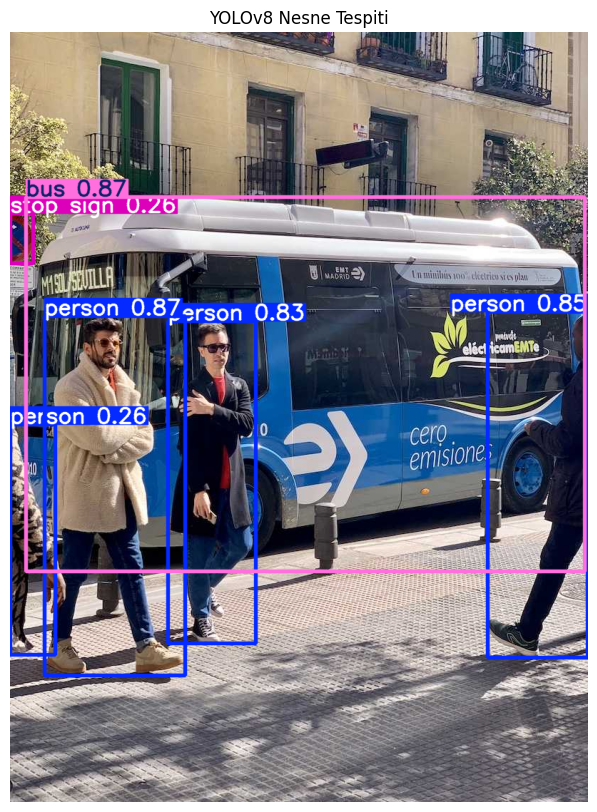

Nesne ID: 5.0, Güven: 0.87, Kutu: [     22.871      231.28         805      756.84]
Nesne ID: 0.0, Güven: 0.87, Kutu: [      48.55      398.55      245.35       902.7]
Nesne ID: 0.0, Güven: 0.85, Kutu: [     669.47      392.19      809.72      877.04]
Nesne ID: 0.0, Güven: 0.83, Kutu: [     221.52       405.8      344.97      857.54]
Nesne ID: 0.0, Güven: 0.26, Kutu: [          0      550.53      63.007      873.44]
Nesne ID: 11.0, Güven: 0.26, Kutu: [   0.058171      254.46      32.557      324.87]


In [ ]:
# Yolo kütüphanesi yüklü değilse yükle
!pip install ultralytics

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Hazır Modeli İndir (YOLOv8 Nano - En hızlı ve küçük versiyon)
model = YOLO('yolov8n.pt')

# 2. Bir Resim Üzerinde Tahmin Yap
# 'bus.jpg' internetten indirilen standart bir örnek resimdir
results = model('https://ultralytics.com/images/bus.jpg')

# 3. Sonuçları Göster
# Results listesindeki ilk eleman bizim resmimiz
res = results[0]

# Kutuları çizilmiş halini al (Plot)
img_plotted = res.plot()

# OpenCV BGR formatında verir, RGB'ye çevirip çizelim
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv8 Nesne Tespiti")
plt.show()

# 4. Koordinatlara Erişmek
for box in res.boxes:
    coords = box.xyxy[0].numpy() # x1, y1, x2, y2
    conf = box.conf[0].numpy()   # Güven skoru (Örn: 0.85)
    cls = box.cls[0].numpy()     # Sınıf ID (Örn: 0 -> İnsan)
    print(f"Nesne ID: {cls}, Güven: {conf:.2f}, Kutu: {coords}")

###Sonuç
Kod çalıştığında, otobüs durağındaki insanların, otobüsün ve kravatların bile ayrı ayrı kutu içine alındığını göreceksiniz. İşte otonom araçların dünyayı gördüğü göz budur.

---------------
# 18- Görüntü Bölütleme (Segmentation): Piksel Piksel Sınıflandırma
-------------
##Giriş: Boyama Kitabı
Sınıflandırma, resme bir etiket yapıştırır ("Kedi"). Tespit, etiketin etrafına kutu çizer ("Kedi burada"). ***Bölütleme (Segmentation)*** ise boyama kitabı gibidir. Kediyi oluşturan her bir pikseli sarıya, arka planı oluşturan pikselleri siyaha boyar.

İki ana türü vardır:

1. ***Semantic Segmentation:*** "Tüm arabaları maviye boya." (Arabaların birbirinden ayrılması önemli değil, hepsi "araba" sınıfıdır).

2. ***Instance Segmentation:*** "Öndeki arabayı maviye, arkadakini yeşile boya." (Her nesne birey olarak ayrılır).

##U-Net Mimarisi
Bölütleme dünyasının kralı, 2015'te biyomedikal görüntüler için geliştirilen U-Net modelidir. Şekli "U" harfine benzer.

* ***Encoder (İniş Yolu):*** Resmi klasik CNN gibi küçültür ve özellikleri çıkarır (Ne olduğunu anlar).

* ***Bottleneck (Dar Boğaz):*** En sıkıştırılmış bilgi buradadır.

* ***Decoder (Çıkış Yolu):*** Resmi tekrar orijinal boyutuna büyütür (Upsampling) ve piksellerin yerini belirler (Nerede olduğunu anlar).

Ancak resmi büyütürken detaylar kaybolur. U-Net, *Skip Connection* kullanarak İniş yolundaki yüksek çözünürlüklü detayları, Çıkış yoluna kopyalar.

## Python Uygulaması: Basit Bir U-Net Bloğu
Tam bir U-Net'i eğitmek zordur, ancak yapısını Keras ile kurmak öğreticidir.

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def simple_unet():
    inputs = Input((128, 128, 3))

    # --- ENCODER (Aşağı İniş) ---
    # Özellik çıkar, boyutu küçült
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1) # 128 -> 64

    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2) # 64 -> 32

    # --- BOTTLENECK (Taban) ---
    b = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)

    # --- DECODER (Yukarı Çıkış) ---
    # Boyutu büyüt ve Encoder'dan gelen bilgiyi yapıştır (Skip Connection)

    u1 = UpSampling2D((2, 2))(b) # 32 -> 64
    concat1 = Concatenate()([u1, c2]) # c2'den gelen detayı ekle
    c3 = Conv2D(32, (3, 3), activation='relu', padding='same')(concat1)

    u2 = UpSampling2D((2, 2))(c3) # 64 -> 128
    concat2 = Concatenate()([u2, c1]) # c1'den gelen detayı ekle
    c4 = Conv2D(16, (3, 3), activation='relu', padding='same')(concat2)

    # Çıktı Katmanı (Her piksel için sınıflandırma)
    # Binary Segmentation (Maske vs Arka plan) -> Sigmoid
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c4)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = simple_unet()
model.summary()

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │        448 │ input_layer_10[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │      4,640 │ max_pooling2d_9[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_10… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_25[0][0]   │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 96)               │            │ conv2d_24[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │     27,680 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 128, 128,  │          0 │ conv2d_26[0][0]   │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 48)               │            │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 128, 128,  │      6,928 │ concatenate_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 128, 128,  │         17 │ conv2d_27[0][0]   │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 58,209 (227.38 KB)

 Trainable params: 58,209 (227.38 KB)

 Non-trainable params: 0 (0.00 B)

###Kod Analizi
<mark>UpSampling2D:</mark> MaxPooling'in tam tersidir. Pikselleri kopyalayarak resmi büyütür.

<mark>Concatenate:</mark> Skip Connection'ı sağlar. Encoder'daki net kenar bilgilerini Decoder'a taşır. Böylece bulanık değil, keskin sınırlar elde ederiz.

---------------
# 19-Autoencoders: Görüntü Gürültüsü Temizleme (Denoising)
-------------
##Giriş: Öğretmensiz Öğrenme
Şu ana kadar hep "Girdi: Resim, Çıktı: Kedi" şeklinde etiketli verilerle çalıştık (Supervised Learning). Peki ya etiketsiz çalışsaydık? Modelden şunu istesek: "Sana bu resmi veriyorum, bana aynısını geri çiz."

Kulağa saçma gelebilir ama modelin resmi aynen çizebilmesi için onu anlaması ve sıkıştırması gerekir. İşte Autoencoder budur.

##Mimari: Kelebek Etkisi
Autoencoder iki parçadan oluşur:

1. ***Encoder:*** Girdiyi alır, çok küçük bir vektöre (Latent Space) sıkıştırır.

2. ***Decoder:*** Bu sıkıştırılmış koddan, orijinal resmi tekrar oluşturmaya çalışır.

Eğer model başarılıysa, o aradaki küçük vektör, resmin "özünü" (essence) taşıyor demektir. Bu teknik şuralarda kullanılır:

* ***Denoising (Gürültü Temizleme):*** Modele kirli resim ver, temiz halini çizmesini iste.

* ***Sıkıştırma:*** Resmi JPG'den çok daha fazla sıkıştırabilir.

* ***Anomaly Detection:*** Üretim bandında hatalı parçayı tespit etmek.

##Python Uygulaması: Gürültü Temizleyici (Denoising Autoencoder)
MNIST rakamlarının üzerine "karlanma" (Noise) ekleyip, modelden bunları temizlemesini isteyeceğiz.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 130s 274ms/step - loss: 0.2609 - val_loss: 0.1177
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 264ms/step - loss: 0.1163 - val_loss: 0.1090
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 243ms/step - loss: 0.1094 - val_loss: 0.1055
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 238ms/step - loss: 0.1061 - val_loss: 0.1046
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 240ms/step - loss: 0.1042 - val_loss: 0.1032
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 238ms/step - loss: 0.1027 - val_loss: 0.1006
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 238ms/step - loss: 0.1012 - val_loss: 0.0996
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 236ms/step - loss: 0.1005 - val_loss: 0.0989
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - loss: 0.0997 - val_loss: 0.0984
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 236ms/step - loss: 0.0992 - val_loss: 0.0978
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


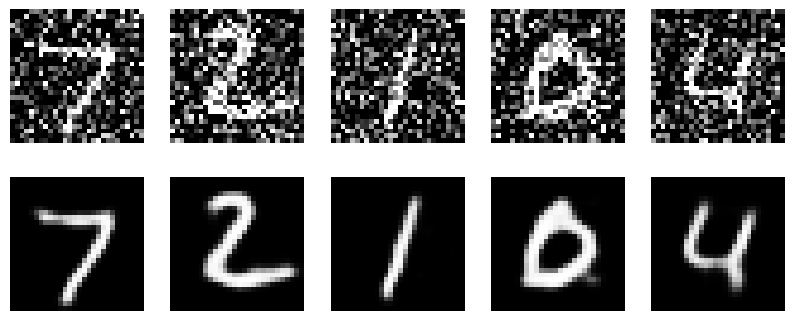

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# 1. Veri Hazırla ve Gürültü Ekle
(x_train, _), (x_test, _) = mnist.load_data() # Etiketlere ihtiyacımız yok!

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Gürültü Ekleme Fonksiyonu
def add_noise(images):
    noise_factor = 0.5
    noisy_imgs = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_imgs, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# 2. Autoencoder Modeli
input_img = Input(shape=(28, 28, 1))

# Encoder (Sıkıştır)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) # Boyut 7x7x32'ye düştü

# Decoder (Genişlet ve Temizle)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. Eğitim (Girdi: Kirli Resim -> Hedef: Temiz Resim)
autoencoder.fit(x_train_noisy, x_train, # Dikkat: Hedef x_train (temiz hali)
                epochs=10,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

# 4. Sonuçları Görselleştir
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Kirli Resim
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Temizlenmiş Resim
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

###Sonuç
Ekranda üst sırada "karlı, bozuk" rakamlar göreceksiniz. Alt sırada ise modelin bu kardan arındırıp yeniden çizdiği "tertemiz" rakamlar olacak. Model, gürültünün "gereksiz detay" olduğunu ve atılması gerektiğini kendi kendine öğrendi.

---------------
# 20- Capstone Projesi: Kedi/Köpek Sınıflandırma (Gerçek Renkli Fotoğraflarla)
-------------

##Proje Tanımı: Kaggle Efsanesi
2013 yılında Kaggle'da düzenlenen bu yarışma, bilgisayarlı görü tarihinin dönüm noktalarından biriydi. Amacımız, rastgele bir fotoğrafın içindeki canlının Kedi mi yoksa Köpek mi olduğunu ayırt etmek.

Bu projede kullanacağımız teknikler:

1. ***Veri Yükleme:*** Google'ın sağladığı filtrelenmiş (2000 Kedi, 2000 Köpek) veri setini kullanacağız.

2. ***Data Augmentation:*** Veri sayısını yapay olarak artıracağız.

3. ***CNN Mimarisi:*** 3 Katmanlı Konvolüsyon Bloğu.

4. ***Binary Classification:*** Çıkış katmanında Sigmoid kullanacağız.

##Python Kodlaması (Tam Sürüm)
Bu kodu Google Colab'da doğrudan çalıştırabilirsin. Veriyi internetten otomatik indirip kuracaktır.

Veri Seti İndiriliyor...
Veri Başarıyla İndirildi ve Hazır: /root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Eğitim Başlıyor... (Bu işlem GPU ile yaklaşık 2-3 dakika sürebilir)
Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.4941 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5351 - loss: 0.6901 - val_accuracy: 0.5150 - val_loss: 0.6768
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.5595 - loss: 0.6852 - val_accuracy: 0.5430 - val_loss: 0.6713
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.5814 - loss: 0.6691 - val_accuracy: 0.6110 - val_loss: 0.6517
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5928 - loss: 0.6754 - val_accuracy: 0.6300 - val_loss: 0.6407
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5769 - loss: 0.6582 - val_accuracy: 0.5580 - val_loss: 0.6715
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5992 - loss: 0.6588 - val_accuracy: 0.6420 - val_loss: 0.6308
Epoch 8/15
100/100 ━━━━━━━━━

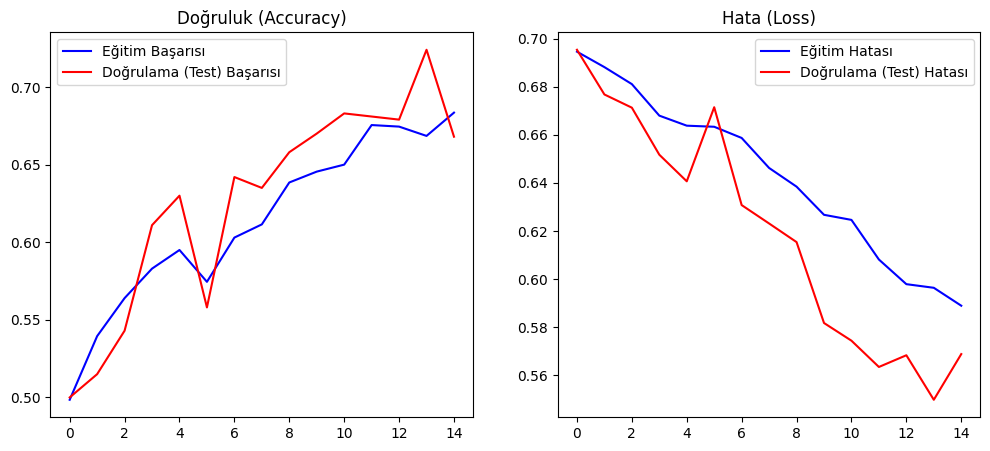


--- Örnek Tahmin Testi ---


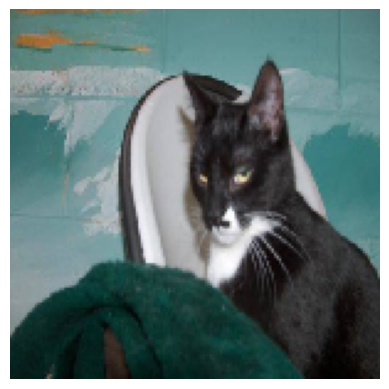

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Gerçek Sınıf: Kedi
Model Tahmini: Köpek (Olasılık: 0.7083)


In [ ]:
import os
import zipfile
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --- 1. VERİ SETİNİ İNDİRME VE HAZIRLAMA ---
print("Veri Seti İndiriliyor...")

# HATA DÜZELTMESİ: Eski link yerine çalışan güncel mirror linki kullanıldı.
_URL = 'https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip'

# Dosyayı indir ve çıkar
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

# İndirilen dosyanın yolunu ayarla
# Düzeltme: get_file, zip'in içeriğini çıkardığı dizinin yolunu döndürür.
# Genellikle bu dizinin içinde "cats_and_dogs_filtered" adında bir ana dizin daha bulunur.
base_dir = os.path.join(path_to_zip, 'cats_and_dogs_filtered')

# Klasör yollarını tanımla
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print(f"Veri Başarıyla İndirildi ve Hazır: {base_dir}")

# --- 2. DATA AUGMENTATION (VERİ ARTIRMA) ---
# Eğitim verisi için artırma teknikleri
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test verisi sadece normalize edilir
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow (Akış) oluşturma - Eğitim
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Flow (Akış) oluşturma - Doğrulama
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# --- 3. CNN MODELİNİ KURMA ---
model = Sequential([
    # Blok 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Blok 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Blok 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Blok 4
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Sınıflandırıcı
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') # 0: Kedi, 1: Köpek
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- 4. EĞİTİM ---
print("\nEğitim Başlıyor... (Bu işlem GPU ile yaklaşık 2-3 dakika sürebilir)")
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 resim / 20 batch = 100 adım
    epochs=15,            # Hızlı sonuç için 15 epoch yeterli (istersen artırabilirsin)
    validation_data=validation_generator,
    validation_steps=50,  # 1000 resim / 20 batch = 50 adım
    verbose=1
)

# --- 5. SONUÇLARI GÖRSELLEŞTİRME ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Eğitim Başarısı')
plt.plot(epochs, val_acc, 'r', label='Doğrulama (Test) Başarısı')
plt.title('Doğruluk (Accuracy)')
plt.legend()

# Hata Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Eğitim Hatası')
plt.plot(epochs, val_loss, 'r', label='Doğrulama (Test) Hatası')
plt.title('Hata (Loss)')
plt.legend()
plt.show()

# --- 6. OTOMATİK TEST (Sistemden Rastgele Bir Resimle) ---
# Drive bağlamadan hemen test etmek için doğrulama setinden rastgele bir resim seçip test ediyoruz.
print("\n--- Örnek Tahmin Testi ---")

# Doğrulama klasöründen rastgele bir dosya seç
import random
class_names = ['cats', 'dogs']
selected_class = random.choice(class_names)
class_dir = os.path.join(validation_dir, selected_class)
random_image = random.choice(os.listdir(class_dir))
img_path = os.path.join(class_dir, random_image)

# Resmi yükle ve işle
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0  # Normalize et

# Görselleştir
plt.imshow(img)
plt.axis('off')
plt.show()

# Tahmin
prediction = model.predict(x)[0][0]
gercek_etiket = 'Kedi' if selected_class == 'cats' else 'Köpek'
tahmin_etiket = 'Köpek' if prediction > 0.5 else 'Kedi'

print(f"Gerçek Sınıf: {gercek_etiket}")
print(f"Model Tahmini: {tahmin_etiket} (Olasılık: {prediction:.4f})")

###Sonuç Yorumu
Eğer her şey yolunda gittiyse, **%75 - %80** arası bir doğruluk oranı görmelisiniz. Sıfırdan (Transfer Learning kullanmadan) ve az veriyle (sınıf başına 1000 resim) bu kadar yüksek bir oran yakalamak, ***Data Augmentation ve CNN***'in gücüdür.

Eğer VGG16 (Transfer Learning) kullansaydık bu oran %95'lere çıkardı (Önceki bölümlerde gördüğümüz gibi).